In [2]:
from google.colab import drive
drive.mount('/content/drive')
import shutil
shutil.copy('/content/drive/MyDrive/train_data.csv', '/content/train_data.csv')
import pandas as pd
data = pd.read_csv('/content/train_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-0cbf82e093af>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/train_data.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

data = data[['reviewText', 'overall']].dropna()
data['overall'] = data['overall'] - 1
data = data[:10000]

train_texts, val_texts, train_labels, val_labels = train_test_split(data['reviewText'], data['overall'], test_size=0.2)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels.tolist())
val_dataset = ReviewDataset(val_encodings, val_labels.tolist())


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()


trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dianazomoroddin (dianazomoroddin-k-n-toosi-university-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [2]:
data = data1[:1000]

In [3]:
data['reviewText'] = data['reviewText'].str.lower().str.replace(r'[^\w\s]', '')

<ipython-input-3-694aec22ea71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText'] = data['reviewText'].str.lower().str.replace(r'[^\w\s]', '')


In [4]:
from sklearn.model_selection import train_test_split

X = data['reviewText']
y = data['overall'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification


tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
def encode_reviews(reviews):
    return tokenizer(reviews.tolist(), padding=True, truncation=True, return_tensors='pt')

train_encodings = encode_reviews(X_train)
test_encodings = encode_reviews(X_test)

In [7]:
from torch.utils.data import DataLoader, Dataset
import torch

class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train.values)
test_dataset = ReviewDataset(test_encodings, y_test.values)

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=50,
    num_train_epochs=3,
    per_device_train_batch_size=1024,
    per_device_eval_batch_size=1024,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: dianazomoroddin (dianazomoroddin-k-n-toosi-university-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<ipython-input-7-04ce9277bc92>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data['overall'].describe()

count    838944.000000
mean          4.021317
std           1.344223
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

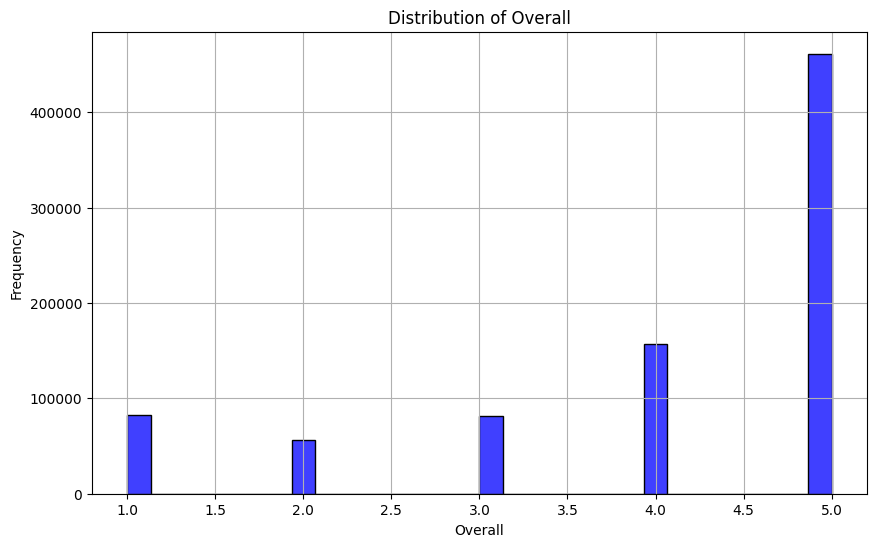

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['overall'], bins=30, kde=False, color='blue')
plt.title('Distribution of Overall')
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.grid()
plt.show()

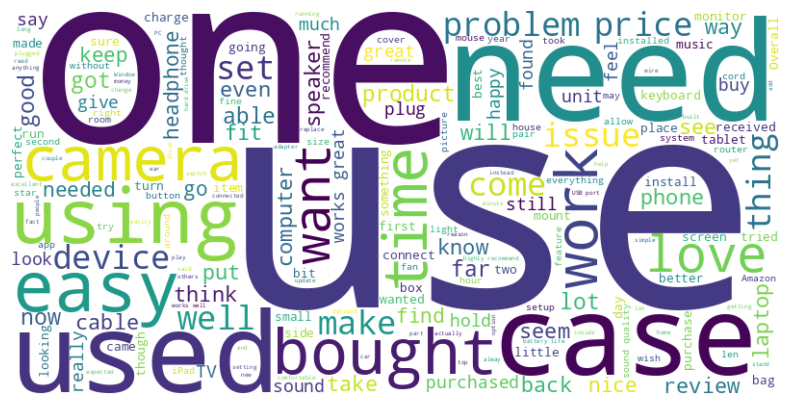

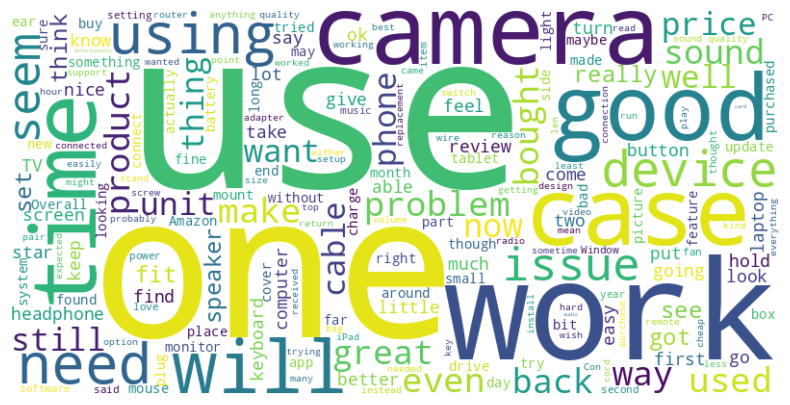

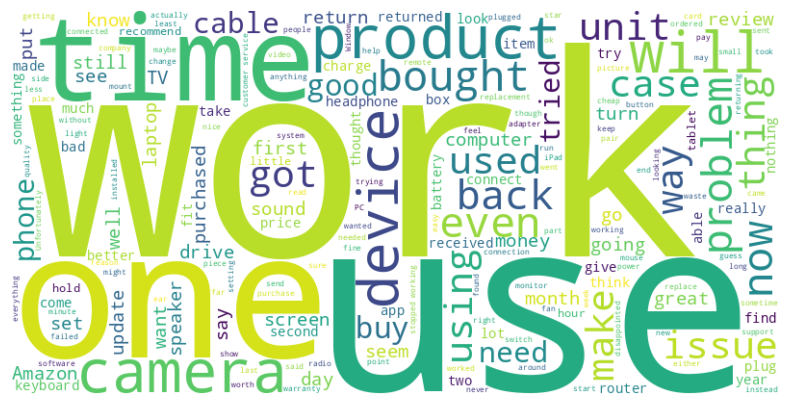

Common Words between Positive and Negative Reviews: {"purchase's", 'clinicians', 'released', '2018**', 'baseboards', '"in-camera"', "'it's", '5200', 'wreaked', 'Daughter', 'hardware/software.', "worker's", 'P.C.', '(rich', 'cheetahs', 'Adata', 'use/setup', 'showstoppers', 'T410,', 'reliable!!', 'LP180', 'megapixels)', 'reigns', 'Fiio', '20100', 'deadening', 'them!!!', 'Removing,', 'widows', 'Amazon),', '~$15', 'boom-mic', 'intensive).', 'DANGEROUSLY', 'drag!', 'BW,', 'case,the', 'Firing', 'Sometimes,', '100c,', 'welcome', 'oval,', 're-apply.', 'U-Turn', 'Alka-Seltzer', 'invert.', '($6),', 'well....good', '10-20%', '32u4', 'buttons...', 'ness', 'fumbling', 'onboard,', 'Erie,', '(unsuccessfully).', 'FREE,', 'Vibrate', 'MIKE', '113F', 'ths', 'Sunpack,', 'something...it', 'outdated', 'holes)', 'pauses/plays', 'Listeners', 'contingent', 'DOUBLE', 'issue!!', 'notices', '@5Ghz', 'Lifetime', 'fuzzy!', 'existent', 'Peavy', 'incessantly.', 'USB-C/USB-A', 'GONE', '730', 'anyone),', 'RX-V681BL', '

In [5]:
positive_reviews = data[data['overall'] >= 4]['reviewText']
neutral_reviews = data[data['overall'] == 3]['reviewText']
negative_reviews = data[data['overall'] <= 2]['reviewText']

positive_text = ' '.join(positive_reviews.dropna())
neutral_text = ' '.join(neutral_reviews.dropna())
negative_text = ' '.join(negative_reviews.dropna())

wordcloud1 = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud2 = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud3 = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()


positive_words = set(positive_text.split())
negative_words = set(negative_text.split())


common_words = positive_words.intersection(negative_words)
print("Common Words between Positive and Negative Reviews:", common_words)


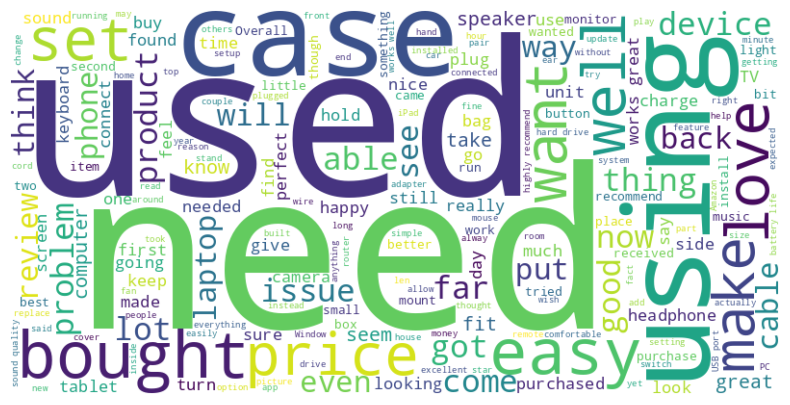

In [6]:
excluded_words = ['use' , 'one' , 'time' ,'camera' , 'work']

filtered_text = ' '.join([word for word in positive_text.split() if word not in excluded_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

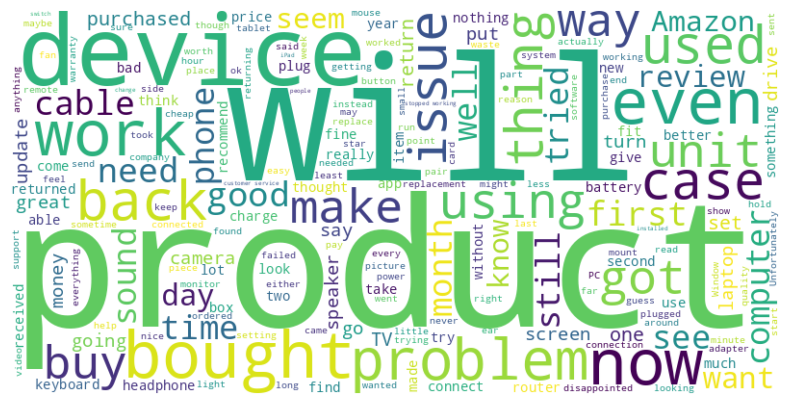

In [7]:
filtered_text = ' '.join([word for word in negative_text.split() if word not in excluded_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_common_words = [word for word in common_words if word.lower() not in stop_words]

common_word_counts = Counter()

positive_comments = data[data['overall'].isin([4, 5])]['reviewText'].tolist()
negative_comments = data[data['overall'].isin([1, 2])]['reviewText'].tolist()


for comment in positive_comments + negative_comments:
    for word in comment.split():
        if word.lower() in filtered_common_words:
            common_word_counts[word.lower()] += 1

most_common_filtered_words = common_word_counts.most_common(5)

print("پرتکرارترین کلمات مشترک بین نظرات مثبت و منفی (بدون کلمات زائد):")
for word, count in most_common_filtered_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
df = data.copy()
df['vote'] = df['vote'].replace('NaN', pd.NA)
df['vote'] = df['vote'].dropna()
df['vote'] = df['vote'].str.replace(',', '', regex=False)
df['vote'] = pd.to_numeric(df['vote'])
total_votes = df.groupby('reviewerID')['vote'].sum().reset_index()
top_10 = total_votes.nlargest(10, 'vote')
print(top_10)

            reviewerID    vote
97732   A25GROL6KJV3QG  4345.0
218123  A3KJ0DF3LTNJ6X  3096.0
48709   A1KPFZCS71QKW5  2978.0
268447    ADLVFFE4VBT8  2605.0
290448   AMYCUX8EWEUVV  2605.0
128674  A2IK776FY6MEMG  2177.0
38885   A1GHPJB2N0D0RL  2167.0
312277   AW7UMXXJKFSNS  1912.0
159458  A2VQ0V1TWXF3U7  1820.0
254026   A7HWU6R6UQIX6  1560.0


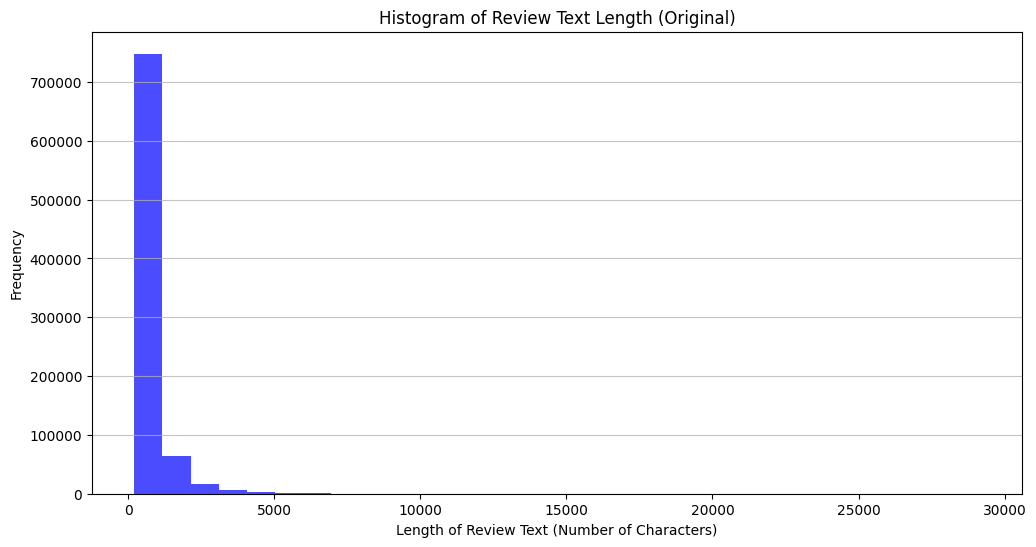

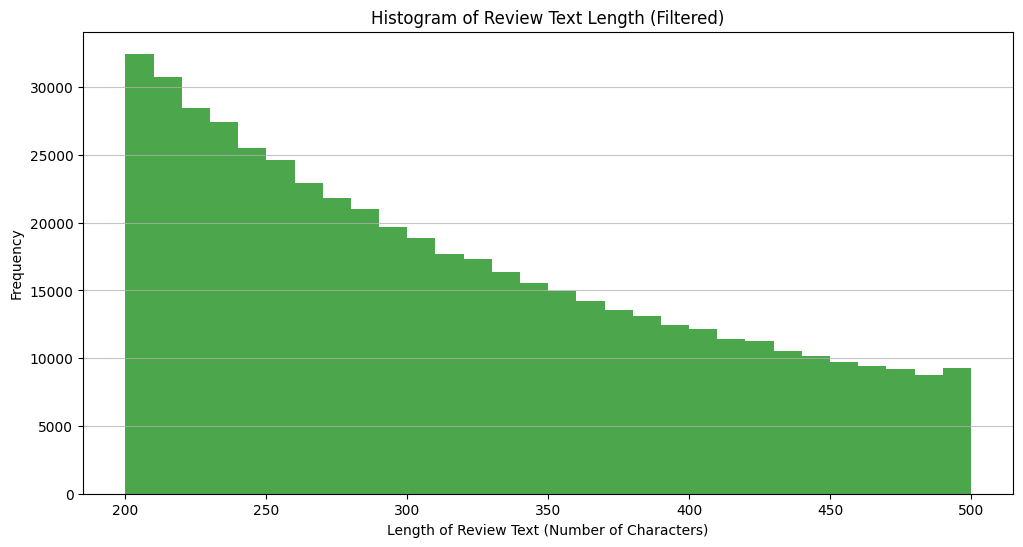

In [ ]:
df['review_length'] = df['reviewText'].str.len()

plt.figure(figsize=(12, 6))
plt.hist(df['review_length'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Review Text Length (Original)')
plt.xlabel('Length of Review Text (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



filtered_df = df[(df['review_length'] >= 10) & (df['review_length'] <= 500)]
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['review_length'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Review Text Length (Filtered)')
plt.xlabel('Length of Review Text (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
df_brands = pd.read_csv('/content/drive/My Drive/title_brand.csv')
merged_df = pd.merge(data, df_brands, on='asin', how='inner')

filtered_df = merged_df[merged_df['overall'] == 5]

top_products = filtered_df.groupby(['brand', 'title']).size().reset_index(name='count')

top_10_products = top_products.nlargest(10, 'count')

print(top_10_products)

                      brand  \
10992  Cambridge Soundworks   
39460               NETGEAR   
49185                  Roku   
56451              StarTech   
34377              Logitech   
51240               Samsung   
39416               NETGEAR   
5073                   Asus   
63425             VideoSecu   
12377               Cheetah   

                                                   title  count  
10992  OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...   1163  
39460          NETGEAR N300 WiFi Range Extender (EX2700)    659  
49185  Roku Streaming Stick (3600R) - HD Streaming Pl...    600  
56451  StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...    598  
34377  Logitech M570 Wireless Trackball Mouse &ndash;...    552  
51240  Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...    529  
39416  NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...    482  
5073   ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...    471  
63425  VideoSecu ML531BE TV Wall Mount for Most 27&qu...    448 

In [ ]:
brand_stats = merged_df.groupby('brand').agg(
    num_reviews=('overall', 'count'),
    avg_score=('overall', 'mean')
).reset_index()

top_brands = brand_stats.nlargest(10, 'num_reviews')

top_brands_sorted = top_brands.sort_values(by='avg_score', ascending=False)

print("\nجدول ۱۰ برند برتر با بیشترین تعداد نظر و میانگین امتیاز:")
print(top_brands_sorted[['brand', 'avg_score']])


جدول ۱۰ برند برتر با بیشترین تعداد نظر و میانگین امتیاز:
              brand  avg_score
889           Anker   4.244320
790    AmazonBasics   4.201468
10375       Sabrent   4.028005
10428       SanDisk   3.958810
7219       Logitech   3.954061
10423       Samsung   3.941268
10924          Sony   3.938726
11509       TP-LINK   3.928681
1091           Asus   3.855550
8188        NETGEAR   3.836274


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=100)

X = vectorizer.fit_transform(merged_df['reviewText'])

X_array = X.toarray()


keywords = ['warranty', 'guarantee']

def filter_reviews(review):
    return any(word in review.lower() for word in keywords)

filtered_reviews = merged_df[merged_df['reviewText'].apply(filter_reviews)]

average_rating = filtered_reviews.groupby('brand')['overall'].mean().reset_index()


print("\nAverage Rating:", average_rating)


Average Rating:            brand   overall
0        007plus  4.000000
1       01 Audio  5.000000
2        02 us 8  4.500000
3       1 BY ONE  3.333333
4     101 AV Inc  5.000000
...          ...       ...
2720  whitelabel  5.000000
2721  winsbotech  5.000000
2722      xmartO  3.000000
2723     zhi yun  3.000000
2724      zigels  5.000000

[2725 rows x 2 columns]


In [ ]:
similar_words = {
    "warrantee", "waranty", "warentee", "warrenty", "waranttee",
    "waranty", "warrantye", "warantty", "warenty", "warrantee",

    "garantee", "guaranty", "guarntee", "guarntee", "guarntee",
    "gurantee", "guaranttee", "guarrantee", "guanrantee", "garuntee",
}


filtered_reviews = merged_df[merged_df['reviewText'].str.contains('|'.join(similar_words), case=False, na=False)]

average_rating = filtered_reviews.groupby('brand')['overall'].mean().reset_index()

print('Average Score:', average_rating)

Average Score:              brand  overall
0            4pmla      5.0
1           AFUNTA      5.0
2              AMD      2.0
3              AOC      2.0
4              APC      2.0
..             ...      ...
219          iLive      4.0
220          iTOMA      3.0
221           iXCC      5.0
222  ifoxcreations      5.0
223        sunshot      1.0

[224 rows x 2 columns]


In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

data =  data[:5000]


In [ ]:
texts = data['reviewText'].tolist()
labels =( data['overall']-1).tolist()

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    return text
import multiprocessing

if __name__ == '__main__':
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        preprocessed_texts = pool.map(preprocess_text, texts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(preprocessed_texts, labels, test_size=0.2, random_state=42)

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings = tokenizer(train_texts, padding='max_length', truncation=True, return_tensors="pt" , max_length=100)
val_encodings = tokenizer(val_texts, padding='max_length', truncation=True, return_tensors="pt" , max_length=100)

train_labels_tensor = torch.tensor(train_labels)
val_labels_tensor = torch.tensor(val_labels)

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels_tensor)
val_dataset = ReviewDataset(val_encodings, val_labels_tensor)


In [ ]:
train_dataset = ReviewDataset(train_encodings, train_labels_tensor)
val_dataset = ReviewDataset(val_encodings, val_labels_tensor)

training_args = TrainingArguments(
    output_dir='./results',
    run_name='my_unique_run',
    num_train_epochs=3,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch"  
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
import torch

torch.cuda.empty_cache()
trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: Currently logged in as: dianazomoroddin (dianazomoroddin-k-n-toosi-university-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
